<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Step 1: Load and Explore the Dataset

In [ ]:
print(boston_df.info())
print(boston_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB
None
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0

# Step 2: Generate Visualizations

## 1. Boxplot for Median Value of Owner-Occupied Homes

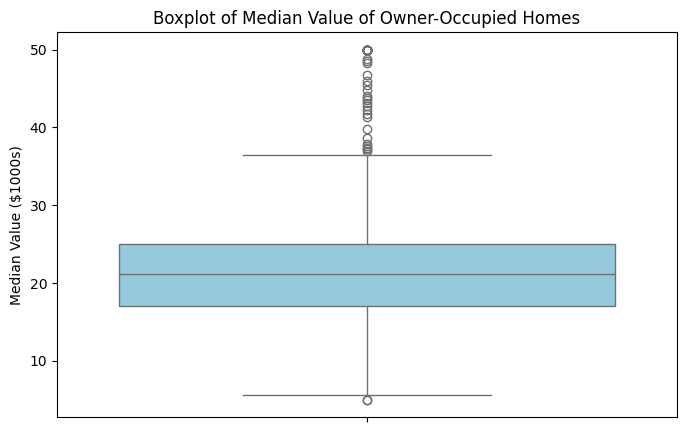

In [ ]:
pyplot.figure(figsize=(8, 5))
sns.boxplot(y=boston_df["MEDV"], color="skyblue")
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes")
pyplot.ylabel("Median Value ($1000s)")
pyplot.show()

## 2. Bar Plot for the Charles River Variable

<ipython-input-7-ab8ce091d64e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=boston_df["CHAS"], palette="coolwarm")


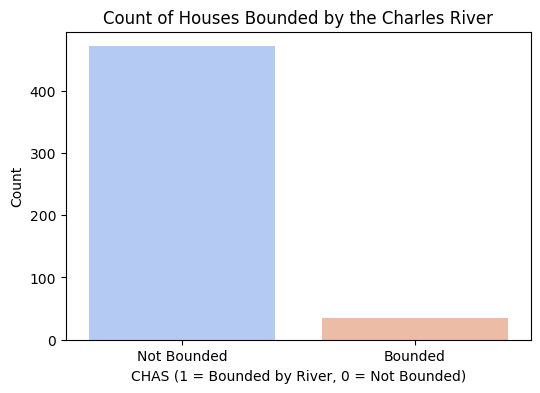

In [ ]:
pyplot.figure(figsize=(6, 4))
sns.countplot(x=boston_df["CHAS"], palette="coolwarm")
pyplot.title("Count of Houses Bounded by the Charles River")
pyplot.xlabel("CHAS (1 = Bounded by River, 0 = Not Bounded)")
pyplot.ylabel("Count")
pyplot.xticks([0, 1], ["Not Bounded", "Bounded"])
pyplot.show()

## 3. Boxplot for MEDV vs. AGE Group

<ipython-input-8-8cb7e9a529f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=boston_df["AGE_Group"], y=boston_df["MEDV"], palette="pastel")


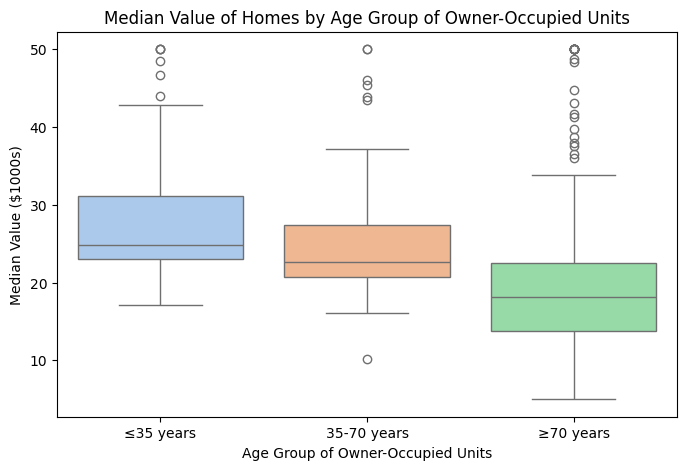

In [ ]:
boston_df["AGE_Group"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100], labels=["≤35 years", "35-70 years", "≥70 years"])

pyplot.figure(figsize=(8, 5))
sns.boxplot(x=boston_df["AGE_Group"], y=boston_df["MEDV"], palette="pastel")
pyplot.title("Median Value of Homes by Age Group of Owner-Occupied Units")
pyplot.xlabel("Age Group of Owner-Occupied Units")
pyplot.ylabel("Median Value ($1000s)")
pyplot.show()

## 4. Scatter Plot for NOX vs. INDUS

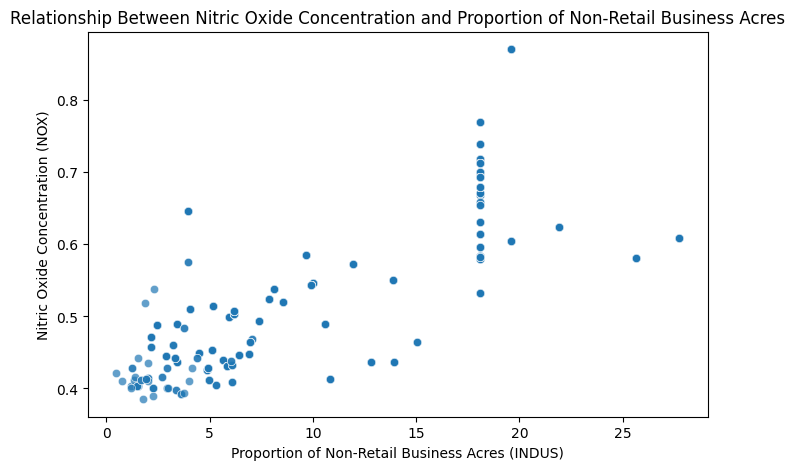

In [ ]:
pyplot.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df["INDUS"], y=boston_df["NOX"], alpha=0.7)
pyplot.title("Relationship Between Nitric Oxide Concentration and Proportion of Non-Retail Business Acres")
pyplot.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
pyplot.ylabel("Nitric Oxide Concentration (NOX)")
pyplot.show()

## 5. Histogram for Pupil-Teacher Ratio (PTRATIO)

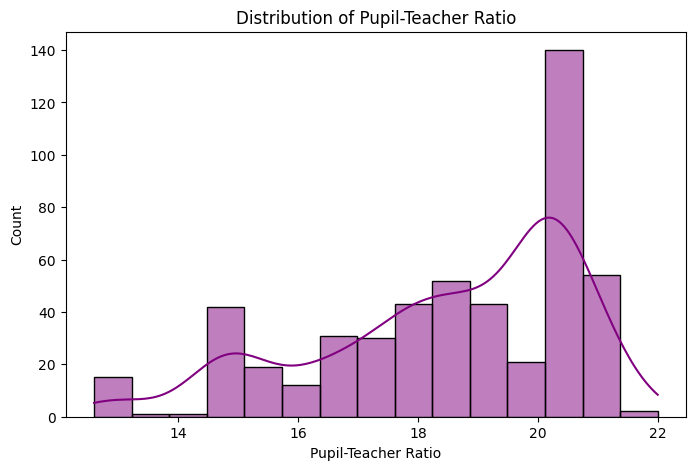

In [ ]:
pyplot.figure(figsize=(8, 5))
sns.histplot(boston_df["PTRATIO"], bins=15, kde=True, color="purple")
pyplot.title("Distribution of Pupil-Teacher Ratio")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Count")
pyplot.show()

# Step 3: Perform Hypothesis Tests

## 1. T-Test: Difference in Median Value of Houses Near the Charles River

In [ ]:
from scipy.stats import ttest_ind

# Split data
medv_river = boston_df[boston_df["CHAS"] == 1]["MEDV"]
medv_no_river = boston_df[boston_df["CHAS"] == 0]["MEDV"]

# Perform T-test
t_stat, p_value = ttest_ind(medv_river, medv_no_river, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median values.")

T-Statistic: 3.113291312794837, P-Value: 0.003567170098137517
Reject the null hypothesis: There is a significant difference in median values.


## 2. ANOVA: Difference in MEDV Across AGE Groups

In [ ]:
from scipy.stats import f_oneway

# Group MEDV by AGE category
medv_35 = boston_df[boston_df["AGE_Group"] == "≤35 years"]["MEDV"]
medv_35_70 = boston_df[boston_df["AGE_Group"] == "35-70 years"]["MEDV"]
medv_70 = boston_df[boston_df["AGE_Group"] == "≥70 years"]["MEDV"]

# Perform ANOVA
f_stat, p_value = f_oneway(medv_35, medv_35_70, medv_70)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in MEDV between age groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in MEDV between age groups.")

F-Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
Reject the null hypothesis: There is a significant difference in MEDV between age groups.


## 3. Pearson Correlation: Relationship Between NOX and INDUS

In [ ]:
from scipy.stats import pearsonr

# Compute correlation
corr_coef, p_value = pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(f"Pearson Correlation: {corr_coef}, P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between NOX and INDUS.")

Pearson Correlation: 0.7636514469209192, P-Value: 7.913361061210442e-98
Reject the null hypothesis: There is a significant correlation between NOX and INDUS.


## 4. Regression: Impact of Distance to Employment Centers on Median Home Value

In [ ]:
# Define independent (X) and dependent (Y) variables
X = boston_df["DIS"]
Y = boston_df["MEDV"]

# Add constant to predictor variable (for intercept)
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(Y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        22:50:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0